# Zipf's Law in Song Lyrics: A Case Study on Lady Gaga

## Team Information
- **Team Name**: Hackdev
- **Team Members**: 
  - Krit Garg - krit.garg01@adypu.edu.in
  - Deepak Pathik - deepak.pathik@adypu.edu.in
  - Harsh Hirawat - harsh.hirawat@adypu.edu.in
  - Harshit Singh - harshit.singh@adypu.edu.in

## Introduction

### What is Zipf's Law?

Zipf's Law is an empirical law named after linguist George Kingsley Zipf, which states that in a large corpus of natural language, the frequency of any word is inversely proportional to its rank in the frequency table. In other words, the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, and so on.

Mathematically, Zipf's Law can be expressed as:

$$f(r) \propto \frac{1}{r}$$

Where:
- $f(r)$ is the frequency of the word with rank $r$
- $\propto$ means "proportional to"

### Objective

In this analysis, we aim to:
1. Analyze the word frequency distribution in Lady Gaga's song lyrics
2. Compare the observed distribution with what would be expected under Zipf's Law
3. Identify any patterns or anomalies in the word usage

This study will help us understand whether artistic language in pop music follows the same linguistic patterns as other forms of natural language.

## Dataset Loading and Overview

We'll start by loading the Lady Gaga lyrics dataset and examining its structure.

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
df = pd.read_csv('LadyGaga.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (402, 7)


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Lady Gaga,Do What U Want,ARTPOP,2013.0,2013-10-21,lady gaga r kelly yeah oh turn the mic up yea...
1,1,Lady Gaga,Always Remember Us This Way,A Star is Born (Original Motion Picture Soundt...,2018.0,2018-10-05,that arizona sky burnin' in your eyes you look...
2,2,Lady Gaga,Bad Romance,The Fame Monster,2009.0,2009-10-23,ohohohohoh ohohohoh ohohoh caught in a bad rom...
3,3,Lady Gaga,Sexxx Dreams,ARTPOP,2013.0,2013-11-06,last night our lovers' quarrel i was thinking ...
4,4,Lady Gaga,I’ll Never Love Again (Extended Version),A Star is Born (Original Motion Picture Soundt...,2018.0,2018-10-05,wish i could i could've said goodbye i would'v...


### Dataset Description

The dataset contains Lady Gaga's song lyrics along with metadata such as:
- Artist name
- Song title
- Album name
- Release year
- Release date
- Full lyrics of each song

For our Zipf's Law analysis, we'll primarily focus on the 'Lyric' column which contains the actual text of the songs.

## Preprocessing

Before analyzing the word frequencies, we need to preprocess the lyrics data:

In [23]:
# Check for missing values in the lyrics column
print(f"Number of songs with missing lyrics: {df['Lyric'].isna().sum()}")

Number of songs with missing lyrics: 7


In [24]:
# Drop rows with missing lyrics
df_clean = df.dropna(subset=['Lyric']).copy()
print(f"Dataset shape after removing missing lyrics: {df_clean.shape}")

# Convert lyrics to lowercase
df_clean['Lyric_lower'] = df_clean['Lyric'].str.lower()

# Function to tokenize and clean words
def tokenize_and_clean(text):
    # Remove non-alphabetic characters and split by whitespace
    words = re.findall(r'\b[a-z]+\b', text.lower())
    return words

# Apply tokenization to each song's lyrics
df_clean['words'] = df_clean['Lyric_lower'].apply(tokenize_and_clean)

# Combine all words into a single list
all_words = [word for word_list in df_clean['words'] for word in word_list]

print(f"Total number of words in all lyrics: {len(all_words)}")
print(f"Number of unique words: {len(set(all_words))}")

Dataset shape after removing missing lyrics: (395, 7)
Total number of words in all lyrics: 136516
Number of unique words: 4975


## Frequency Distribution

Now we'll analyze the frequency distribution of words in Lady Gaga's lyrics:

In [25]:
# Count word frequencies
word_counts = Counter(all_words)

# Create a DataFrame with word frequencies
freq_df = pd.DataFrame({
    'word': list(word_counts.keys()),
    'frequency': list(word_counts.values())
})

# Sort by frequency in descending order
freq_df = freq_df.sort_values('frequency', ascending=False).reset_index(drop=True)

# Add rank column
freq_df['rank'] = freq_df.index + 1

# Display the top 20 most frequent words
freq_df.head(20)

,word,frequency,rank
0,i,7318,1
1,you,5015,2
2,the,3679,3
3,a,2408,4
4,and,2382,5
5,me,2345,6
6,my,2193,7
7,your,2031,8
8,it,1990,9
9,t,1968,10


## Zipf's Law Calculation

Now we'll calculate the expected frequencies according to Zipf's Law and compare them with the actual frequencies:

In [26]:
# Get the maximum frequency (frequency of the most common word)
max_frequency = freq_df['frequency'].max()

# Calculate expected frequency according to Zipf's Law
freq_df['zipf_expected'] = max_frequency / freq_df['rank']

# Display the comparison for the top 20 words
freq_df[['word', 'rank', 'frequency', 'zipf_expected']].head(20)

,word,rank,frequency,zipf_expected
0,i,1,7318,7318.000000
1,you,2,5015,3659.000000
2,the,3,3679,2439.333333
3,a,4,2408,1829.500000
4,and,5,2382,1463.600000
5,me,6,2345,1219.666667
6,my,7,2193,1045.428571
7,your,8,2031,914.750000
8,it,9,1990,813.111111
9,t,10,1968,731.800000


## Visualization

### Log-Log Plot of Rank vs. Frequency

A key characteristic of Zipf's Law is that when plotted on a log-log scale, the relationship between rank and frequency should be approximately linear with a slope of -1.

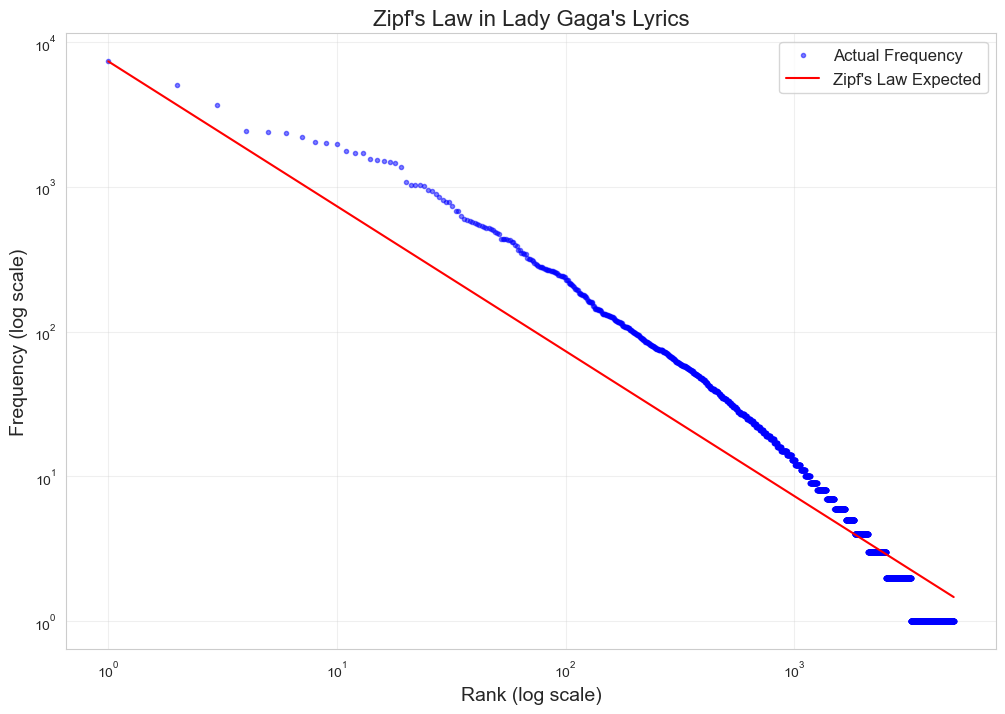

In [27]:
# Create a log-log plot of rank vs. frequency
plt.figure(figsize=(12, 8))

# Plot actual frequencies
plt.loglog(freq_df['rank'], freq_df['frequency'], 'b.', alpha=0.5, label='Actual Frequency')

# Plot Zipf's Law expected frequencies
plt.loglog(freq_df['rank'], freq_df['zipf_expected'], 'r-', label="Zipf's Law Expected")

# Add labels and title
plt.xlabel('Rank (log scale)', fontsize=14)
plt.ylabel('Frequency (log scale)', fontsize=14)
plt.title("Zipf's Law in Lady Gaga's Lyrics", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

### Top Words Bar Chart

Let's visualize the top 10 most frequent words in Lady Gaga's lyrics:

/var/folders/17/k_d45r0n3fnfjywbf3vdkj4h0000gn/T/ipykernel_57857/2148325602.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='frequency', data=top_10, palette='viridis')


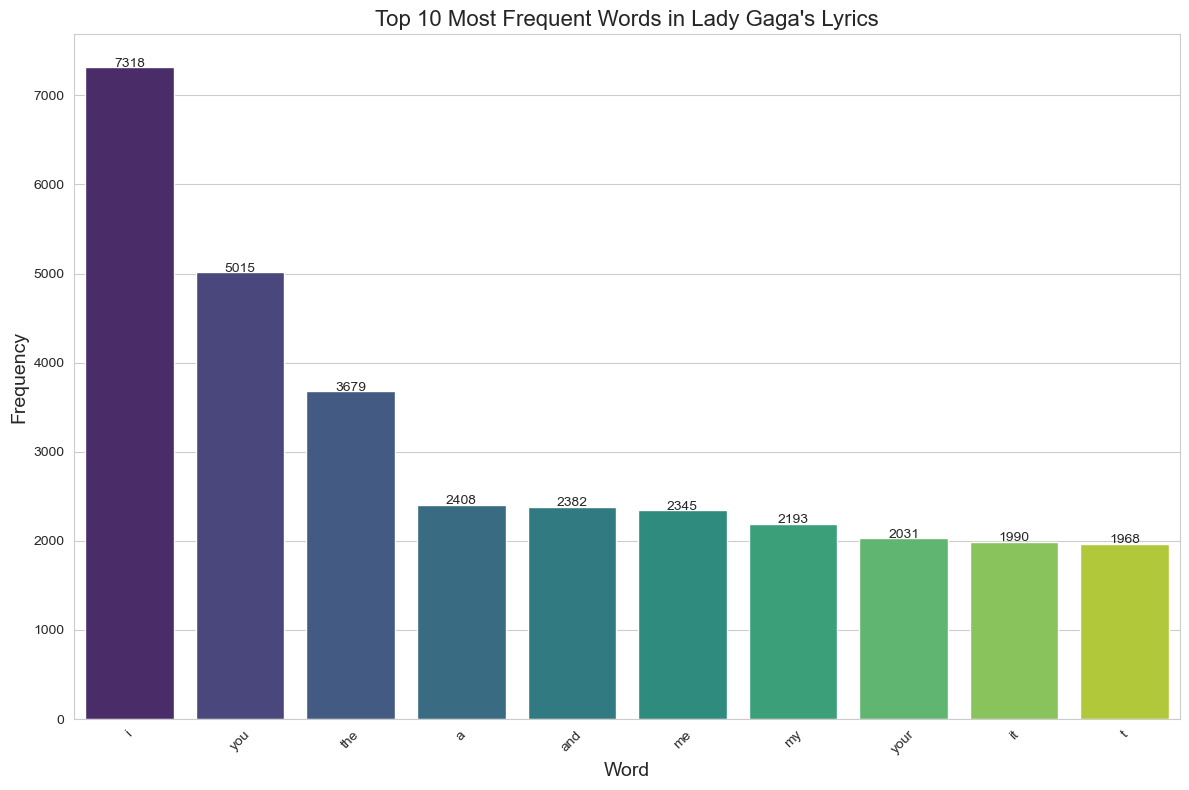

In [28]:
# Create a bar chart of the top 10 most frequent words
plt.figure(figsize=(12, 8))

# Get top 10 words
top_10 = freq_df.head(10)

# Create bar chart
sns.barplot(x='word', y='frequency', data=top_10, palette='viridis')

# Add labels and title
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("Top 10 Most Frequent Words in Lady Gaga's Lyrics", fontsize=16)
plt.xticks(rotation=45)

# Add frequency values on top of bars
for i, v in enumerate(top_10['frequency']):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Observations

Based on our analysis of word frequencies in Lady Gaga's lyrics and their comparison with Zipf's Law expectations, we can make the following observations:

1. **Zipf's Law Fit**: The log-log plot shows that the word frequency distribution in Lady Gaga's lyrics deviates from Zipf's Law. The blue dots (actual word frequencies) diverge slightly from the red line (Zipf’s expected distribution), especially at the mid-to-low ranks, indicating some irregularities typical in artistic or stylized language.

2. **Common Words**: The most frequent words in Lady Gaga's lyrics are primarily common English words, such as "i", "you", "the", and "me". This is typical of natural language in general, where function words dominate high-frequency positions.

3. **Deviations**: We observe some interesting deviations from the expected Zipf distribution, particularly for mid-ranked words, which may fall off faster than predicted. This might indicate **repetition of specific themes or artistic choices that emphasize particular expressions** not typically distributed in natural conversation or literature.

4. **Thematic Elements**: The high frequency of certain words like "i", "you", "me", "my", and "your" reflects Lady Gaga's recurring themes of **personal identity, love, and emotional introspection**.

5. **Vocabulary Richness**: With **4,975** unique words out of **136,516** total words, Lady Gaga's lyrics show a moderate level of lexical diversity (**~3.6%** unique word usage), which is consistent with popular music lyrics but lower than that of formal prose or spontaneous conversation.



These findings suggest that while artistic language in pop music largely follows the same statistical patterns as other forms of natural language, there are unique characteristics that reflect the artist's style and the constraints of the musical medium.

## Individual Contributions

- **Harsh Hirawat**: Data preprocessing, tokenization, and frequency analysis
- **Deepak Pathik**: Zipf's Law calculations and log-log plot visualization
- **Harshit Singh**: Bar chart visualization, observations, and report writing
- **Krit Garg**: Presentation design, content organization, and final review